In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Membuat Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


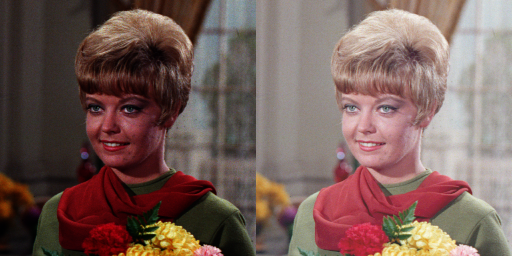

In [2]:
import cv2 as cv
import numpy as np
from skimage import io
from google.colab.patches import cv_imshow

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:gamma = int(input('Masukkan nilai Gamma: '))
except ValueError: print('Error, not a number')

ori = cv.imread('/content/drive/My Drive/PCVK/Week3/female.tiff')

if ori is None:
    print("Gambar tidak ditemukan.")
else:
    gamma_corrected = np.power(ori / 255.0, 1/gamma) * 255.0
    gamma_corrected = np.uint8(gamma_corrected)

    final_frame = cv.hconcat((ori, gamma_corrected))
    cv_imshow(final_frame)

## 2. Memuat Simulasi Image Depth

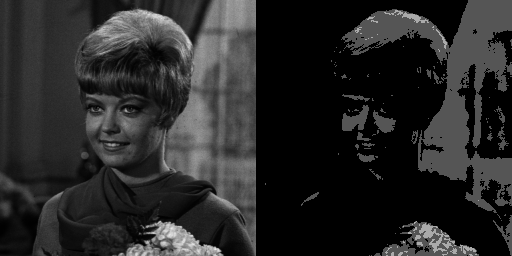

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
ori = cv.imread('/content/drive/My Drive/PCVK/Week3/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(ori.shape, ori.dtype)

for i in range(ori.shape[0]):
    for j in range(ori.shape[1]):
        pixel_value = ori[i, j]
        depth_value = int(pixel_value / level)
        depth_image[i, j] = depth_value * level

final_frame = cv.hconcat((ori, depth_image))
cv2_imshow(final_frame)

## 3.Membuat modul Average Denoising

In [16]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from math import log10, sqrt
import glob

def calculate_average_psnr(noise_number):
    # Load original image (assuming 'original.jpg' is the filename)
    original = cv.imread('/content/drive/MyDrive/PCVK/Week5/galaxy.jpg')

    # Load noisy images
    cv_img = []
    for img_path in glob.glob('/content/drive/My Drive/PCVK/Week5/noises/*.jpg'):
        img = cv.imread(img_path)
        cv_img.append(img)

    # Initialize the combined image as the first noisy image
    dst = cv_img[0]

    # Combine noisy images
    for i in range(1, noise_number):  # Start from 1 since the first image is already assigned to dst
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

    def PSNR(original, compressed):
        mse = np.mean((original - compressed) ** 2)
        if mse == 0:  # MSE is zero means no noise is present in the signal.
                      # Therefore PSNR has no importance.
            return 100
        max_pixel = 255.0
        psnr = 20 * log10(max_pixel / sqrt(mse))
        return psnr

    compressed = dst
    psnr = PSNR(original, compressed)

    print(f'Nilai PSNR untuk {noise_number} citra adalah', psnr, '(dB)')
    galaxy_frame = cv.hconcat((original, dst))
    cv2_imshow(galaxy_frame)


### Jumlah Citra di Average = 5

Nilai PSNR untuk 5 citra adalah 27.533744692510787 (dB)


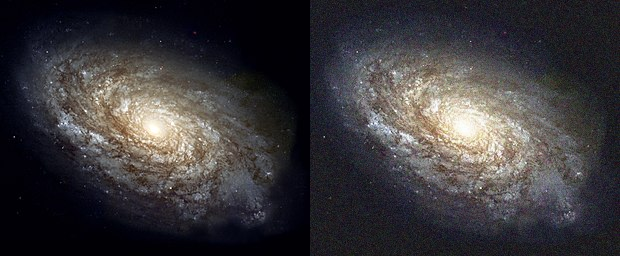

In [17]:
calculate_average_psnr(5)

Nilai PSNR untuk 10 citra adalah 27.55699362535932 (dB)


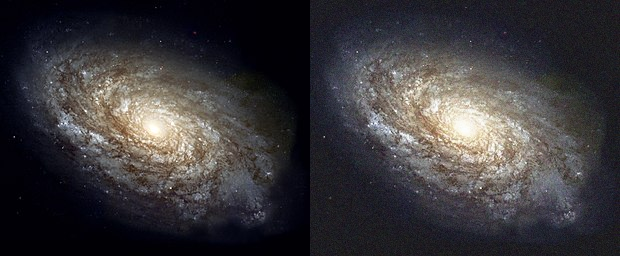

In [18]:
calculate_average_psnr(10)

Nilai PSNR untuk 20 citra adalah 27.54566390498929 (dB)


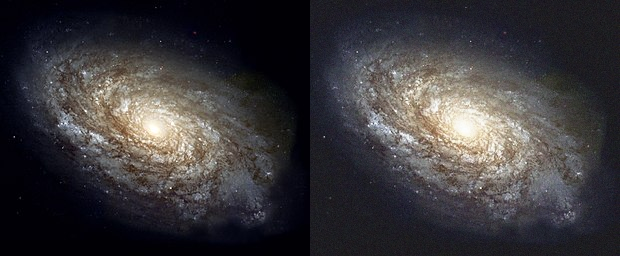

In [19]:
calculate_average_psnr(20)

Nilai PSNR untuk 40 citra adalah 27.495595187722092 (dB)


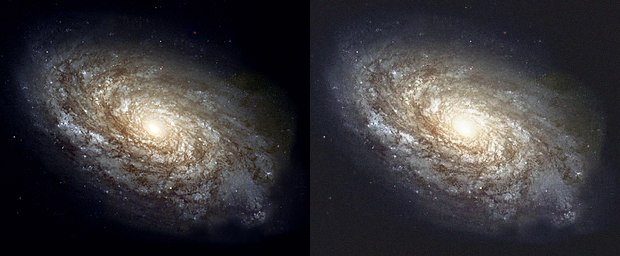

In [20]:
calculate_average_psnr(40)

Nilai PSNR untuk 80 citra adalah 27.49708660121408 (dB)


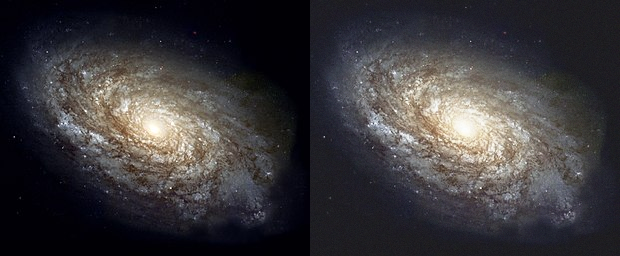

In [21]:
calculate_average_psnr(80)

Nilai PSNR untuk 100 citra adalah 27.50491585471763 (dB)


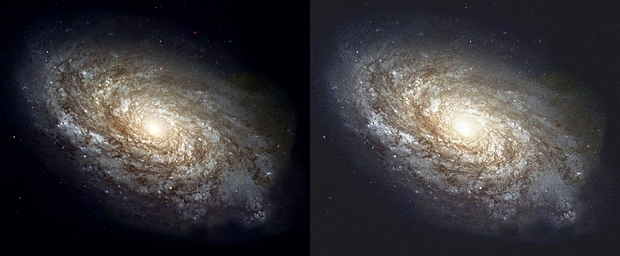

In [22]:
calculate_average_psnr(100)

## Pertanyaan
### Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah.

### Jawab : Semakin tinggi nilai PSNR nya maka menunjukkan bahwa gambar hasil penggabungan memiliki kualitas yang sangat baik, jauh lebih halus, dan memiliki kemiripan yang tinggi dengan aslinya, begitu juga sebaliknya jika nilai PSNR semakin rendah maka kulitas gambar akan terlihat kasar berbeda dengan gambar aslinya

## 4.Membuat image masking


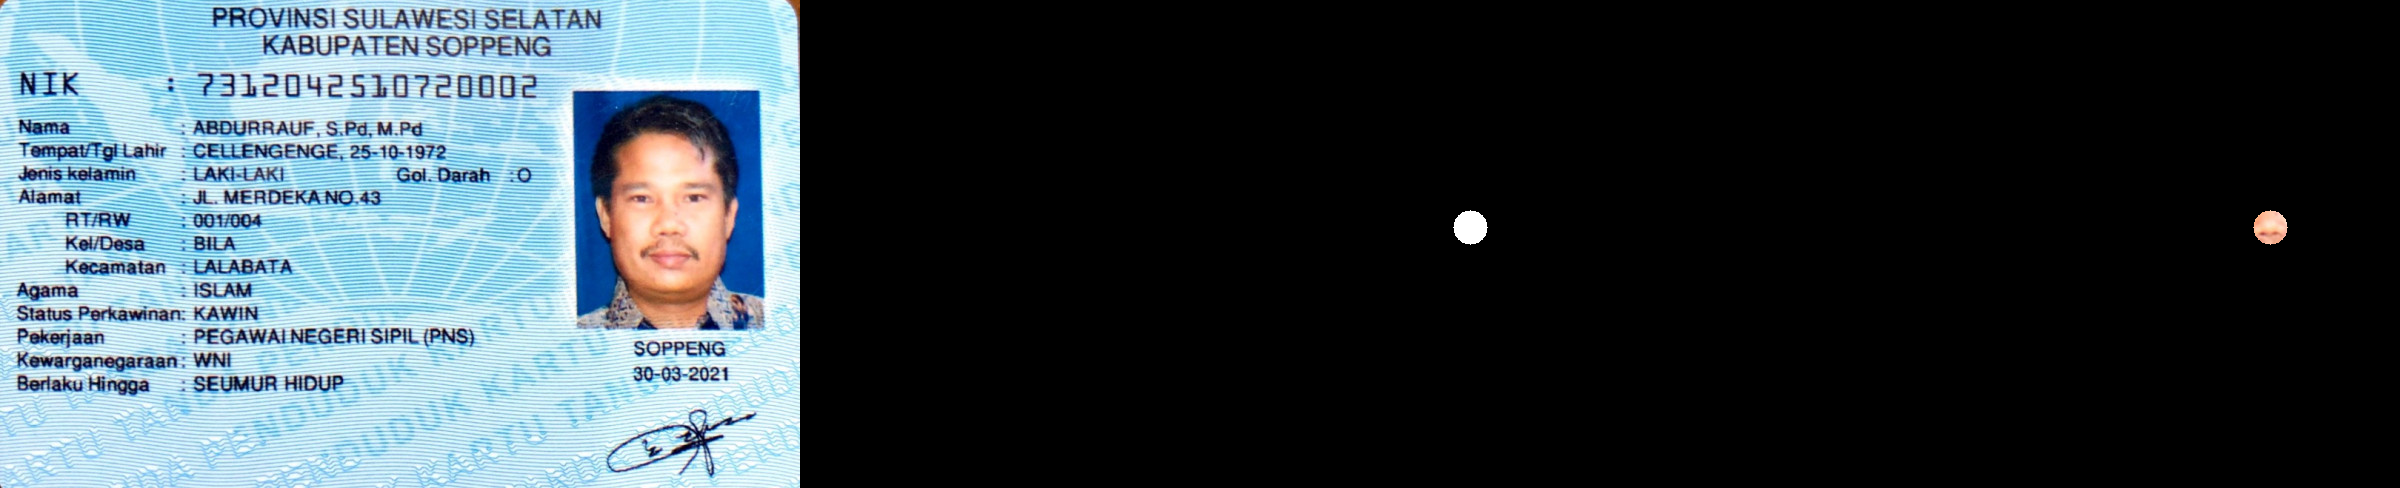

In [52]:
import cv2
import numpy as np

# Membaca gambar asli
original = cv2.imread('/content/drive/MyDrive/PCVK/Week3/KTP.jpg')

# Membuat gambar kosong
mask = np.zeros(original.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
center1 = (670, 227)
radius1 = 17
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background

final = cv2.bitwise_and(original, mask)

# Menggabungkan gambar asli dan mask secara horizontal
side_by_side = cv2.hconcat([original, mask,final])

# Menampilkan gambar yang telah digabungkan
cv2_imshow(side_by_side)

## 5.Image masking dengan NOT,OR,AND,NAND(NotAnd),XOR(Exlusive Or)

In [53]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def nomor5(original, mask, operation):
    if operation == 'AND':
        result = cv2.bitwise_and(original, mask)
    elif operation == 'NOT':
        result = cv2.bitwise_not(original) & cv2.bitwise_not(mask)
    elif operation == 'OR':
        result = cv2.bitwise_or(original, mask)
    elif operation == 'XOR':
        result = cv2.bitwise_xor(original, mask)
    elif operation == 'NAND':
        result = cv2.bitwise_not(cv2.bitwise_and(original, mask))

    side_by_side = cv2.hconcat([original, mask, result])
    cv2_imshow(side_by_side)

# Contoh pemanggilan dengan operasi AND
original = cv2.imread('/content/drive/MyDrive/PCVK/Week3/KTP.jpg')
mask = np.zeros(original.shape, dtype=np.uint8)
center1 = (670, 227)
radius1 = 17
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

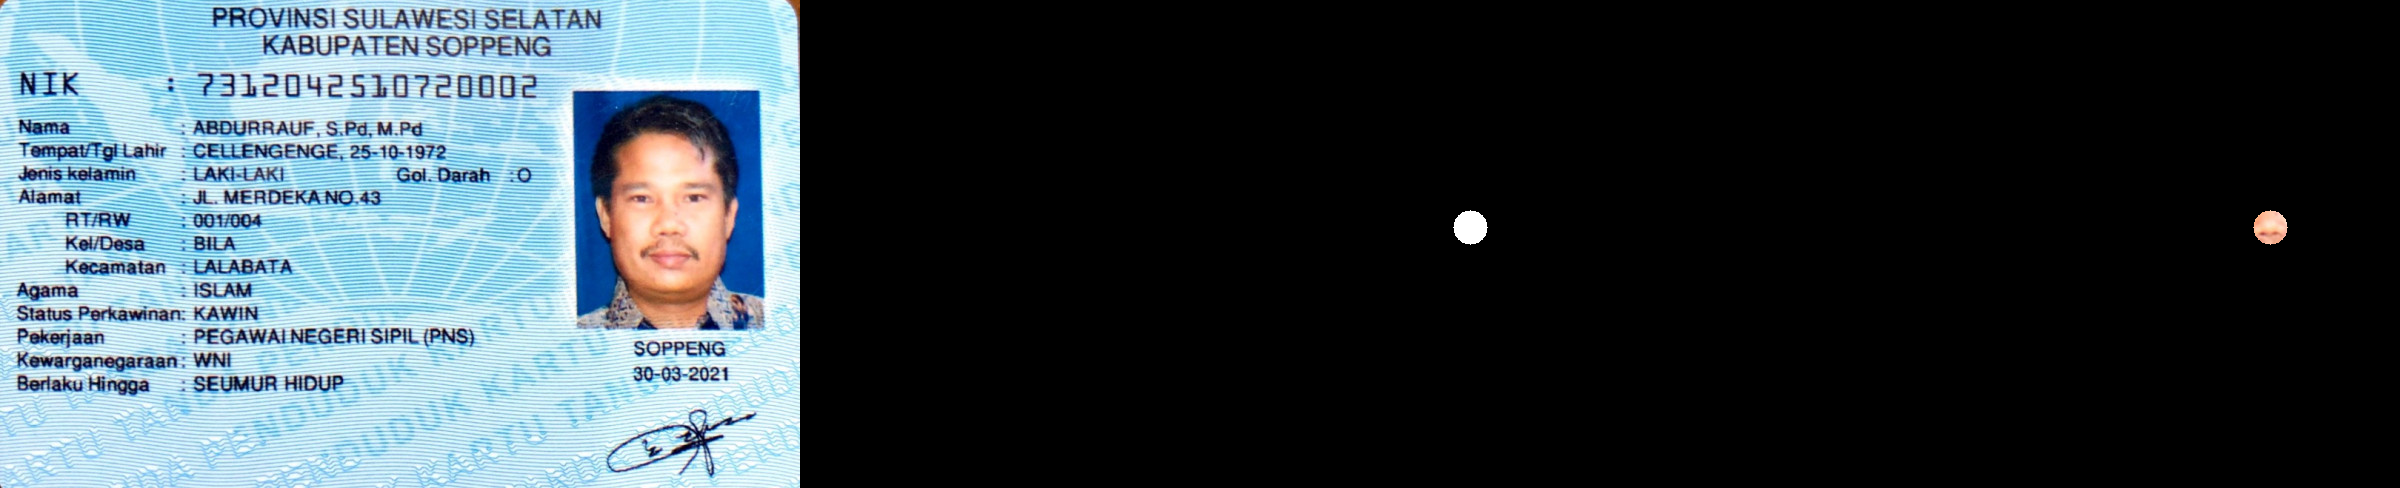

In [54]:
nomor5(original, mask, 'AND')

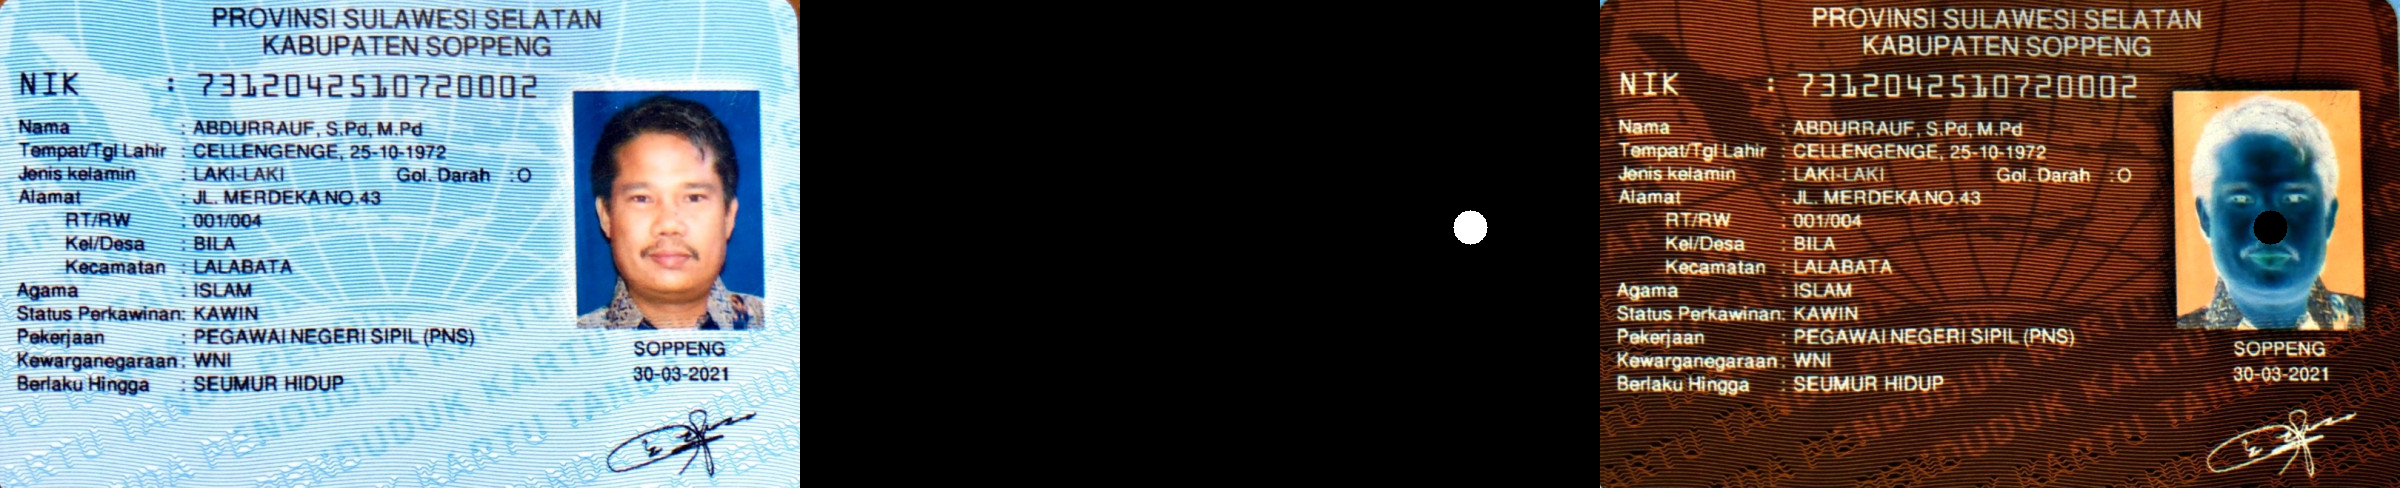

In [55]:
nomor5(original, mask, 'NOT')

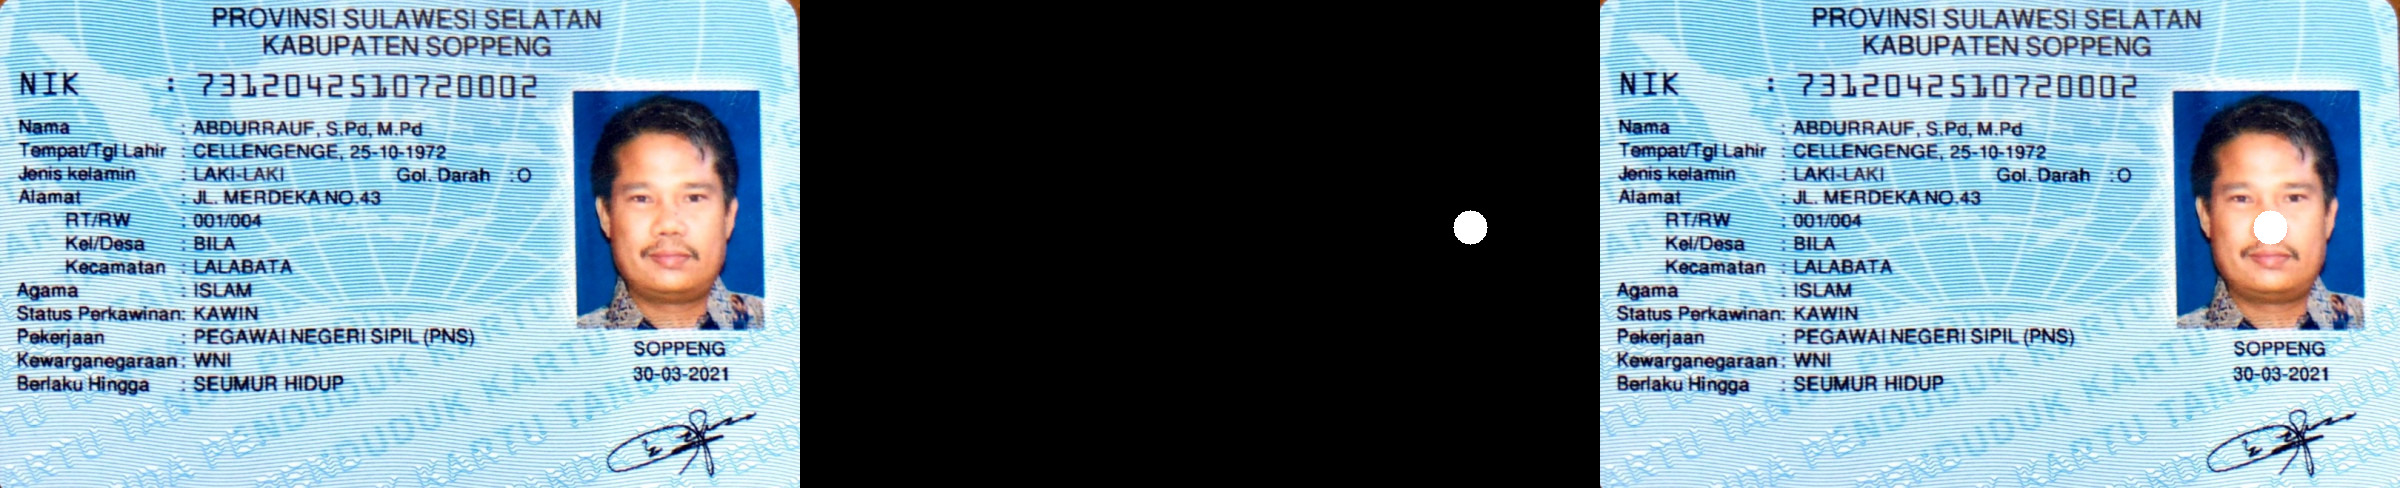

In [56]:
nomor5(original, mask, 'OR')

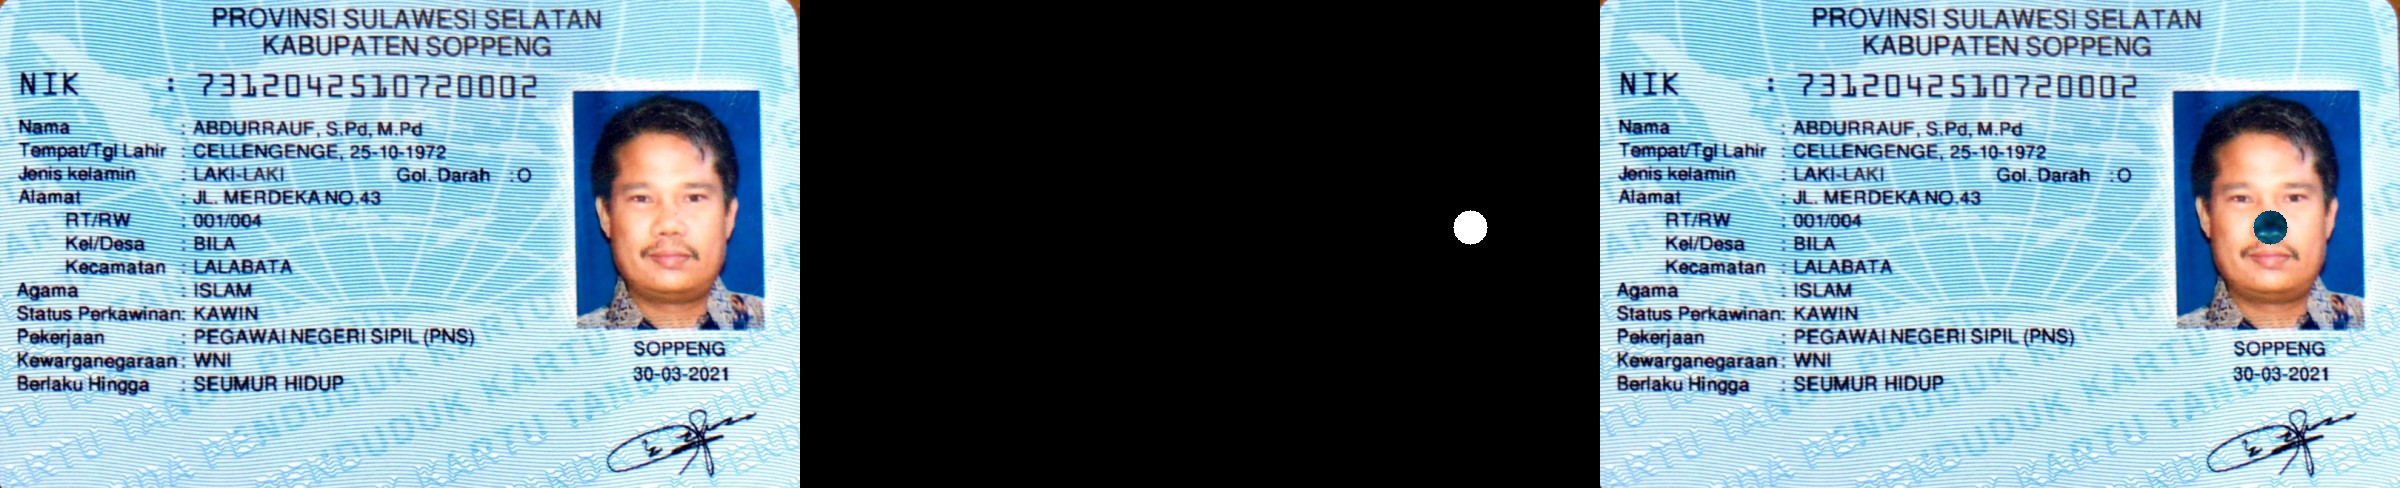

In [57]:
nomor5(original, mask, 'XOR')

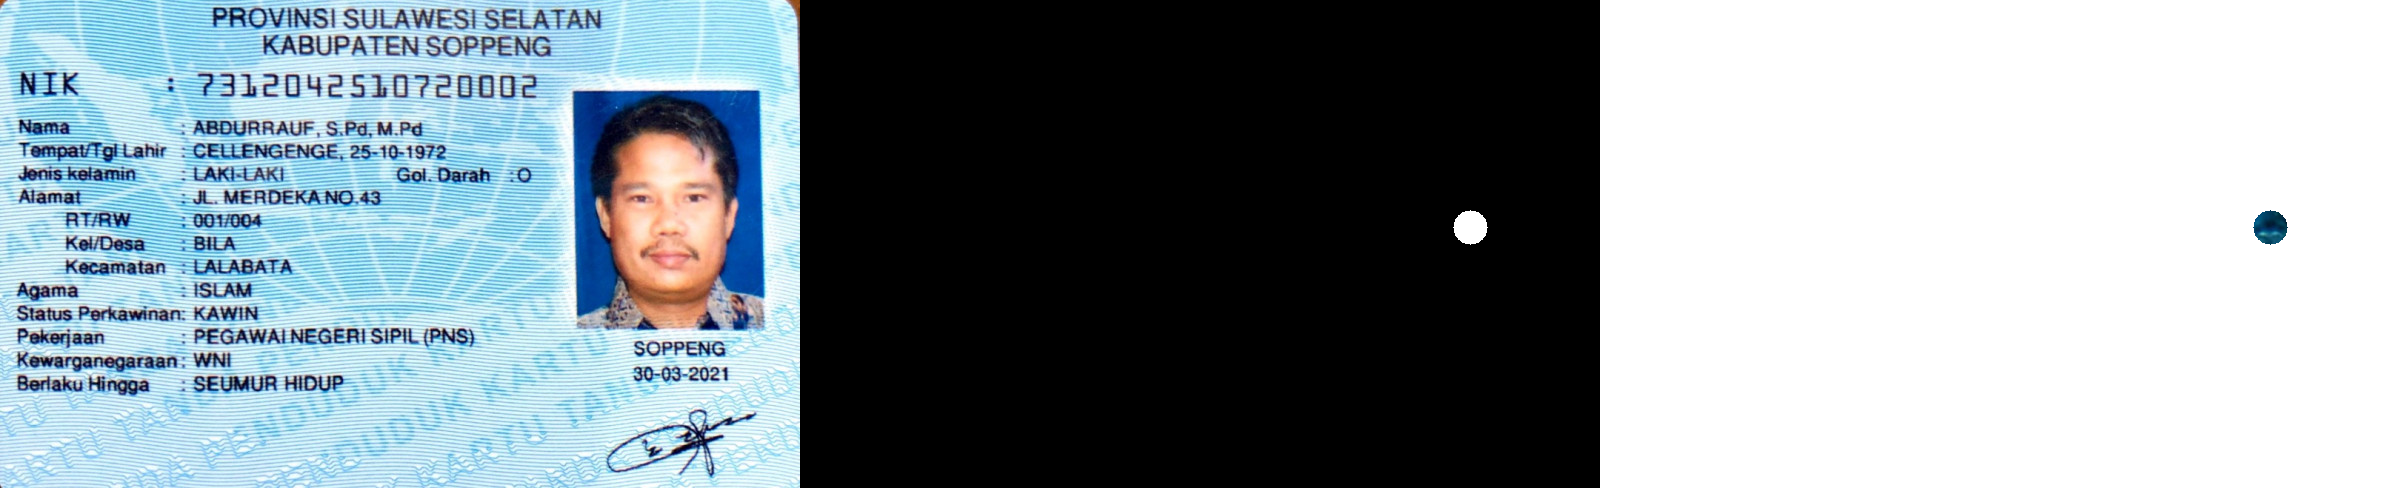

In [58]:
nomor5(original, mask, 'NAND')

## Pertanyaan

### Tuliskan hasil analisa anda:
### Jawab :
* NOT:
Operasi NOT pada citra membalikkan warna semua piksel dalam citra asli.
Setiap piksel putih menjadi hitam, dan sebaliknya.
Masking tidak berlaku dalam operasi ini, sehingga hasilnya adalah negasi warna seluruh citra.

* OR:
Operasi OR menggabungkan citra asli dengan masker.
Hasil akhir adalah hasil penggabungan citra asli dan masker, yang dapat menghasilkan perubahan pada area tertentu dalam citra asli.

* AND:
Operasi AND menggabungkan citra asli dengan masker, tetapi hanya menampilkan bagian citra asli yang berada dalam area masker.
Bagian di luar masker tidak ditampilkan dalam hasil akhir.

* NAND:
Operasi NAND memiliki hasil yang sama dengan operasi AND, tetapi dengan perbedaan bahwa warna pada hasil akhirnya terbalik.
Bagian dalam masker tetap sama, tetapi bagian di luar masker mengalami negasi warna.

* XOR:
Operasi XOR menggabungkan citra asli dengan masker, tetapi hanya mengubah warna pada area masker.
Hasilnya adalah kombinasi eksklusif dari warna dalam citra asli dan masker, menghasilkan perubahan warna pada area yang tertutupi oleh masker.